In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [14]:
dat=pd.read_csv('../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
dat.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [15]:
#find the missing values
dat.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [16]:
#data frame infor
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [17]:
#Descriptive stats
dat.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [18]:
#data shape
dat.shape

(1470, 35)

In [19]:
# count values in a column
dat['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [20]:
# use .factorize function to encode the labels in the data
dat['Attrition']=dat['Attrition'].factorize(['No','Yes'])[0]
dat.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


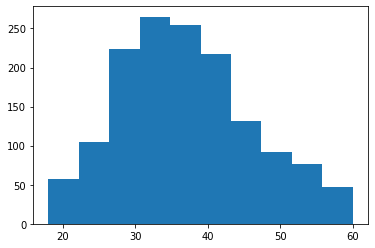

In [21]:
plt.hist(dat['Age'])
plt.show()

In [22]:
dat['Age'].value_counts(sort=True).head()

35    78
34    77
36    69
31    69
29    68
Name: Age, dtype: int64

In [23]:
dat['StandardHours'].value_counts()


80    1470
Name: StandardHours, dtype: int64

In [24]:
dat['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [25]:
dat=dat.drop(['StandardHours','EmployeeCount'],axis=1)
dat.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [26]:
#Compute correlation 
corr=dat.corr()

<AxesSubplot:>

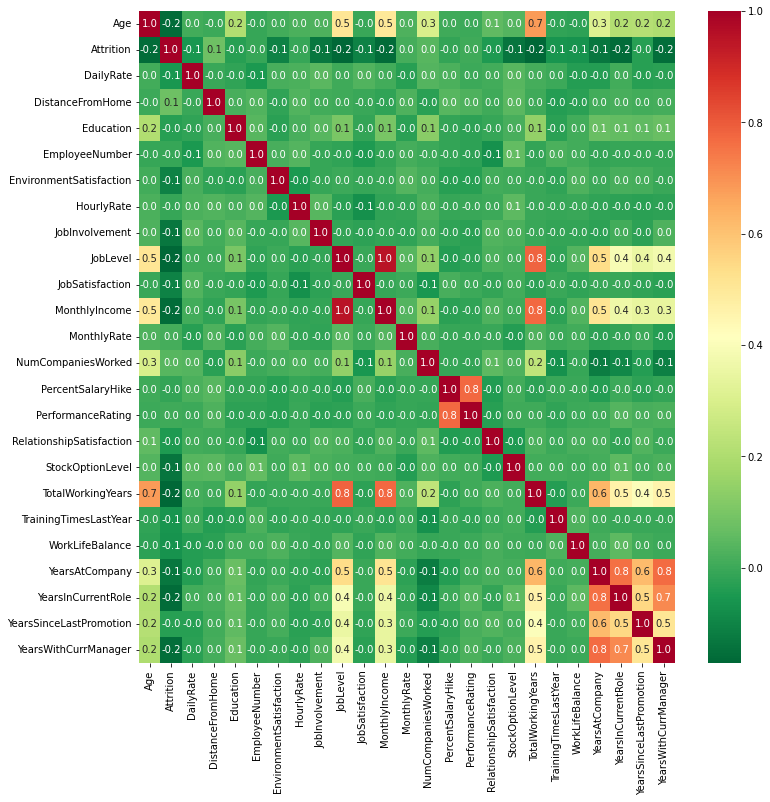

In [27]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,cbar=True,cmap="RdYlGn_r",fmt='.1f')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='YearsAtCompany'>

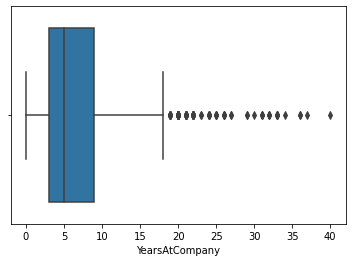

In [28]:
#Check for outliers 
sns.boxplot(dat['YearsAtCompany'])

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

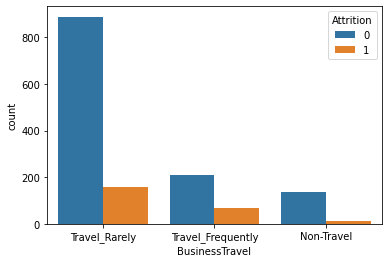

In [29]:
#count plots for checking the relationship 
sns.countplot(x=dat['BusinessTravel'],hue='Attrition',data=dat)

(array([0, 1, 2]),
 [Text(0, 0, 'Sales'),
  Text(1, 0, 'Research & Development'),
  Text(2, 0, 'Human Resources')])

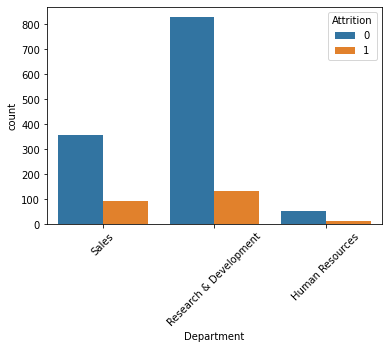

In [30]:
sns.countplot(x='Department',hue='Attrition',data=dat)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='Gender', ylabel='count'>

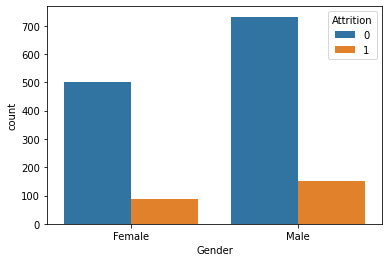

In [31]:
sns.countplot(x='Gender',hue="Attrition",data=dat)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

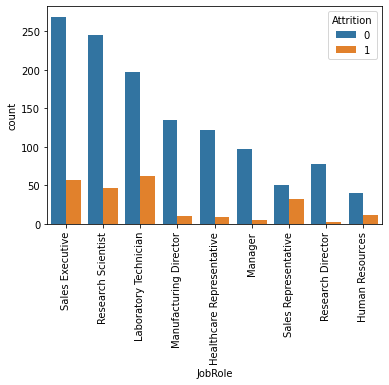

In [32]:
sns.countplot(x='JobRole',hue='Attrition',data=dat)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

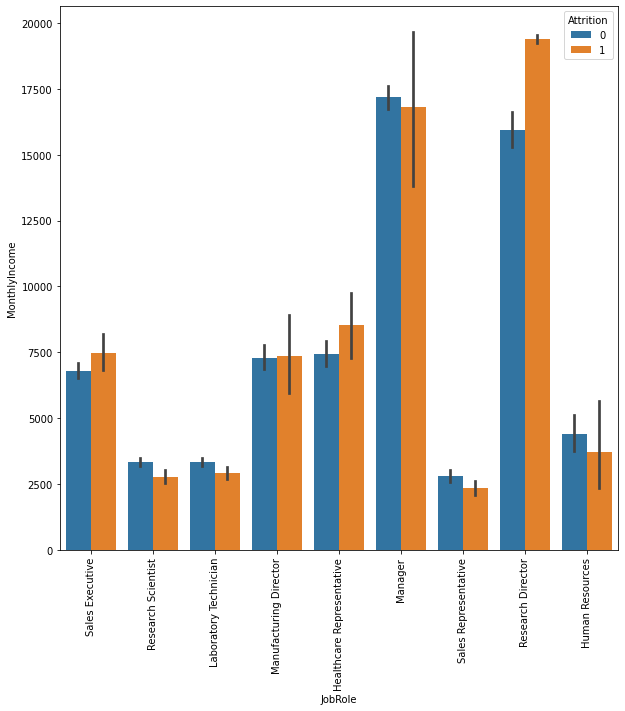

In [33]:
plt.figure(figsize=(10,10))
sns.barplot(x='JobRole',y='MonthlyIncome',hue='Attrition',data=dat)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Medical'),
  Text(3, 0, 'Marketing'),
  Text(4, 0, 'Technical Degree'),
  Text(5, 0, 'Human Resources')])

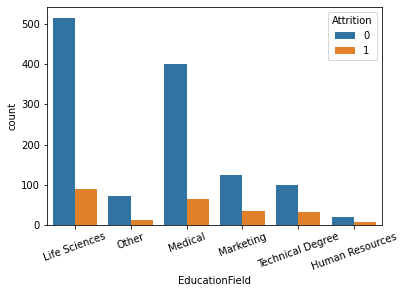

In [34]:
sns.countplot(x='EducationField',hue='Attrition',data=dat)
plt.xticks(rotation=20)

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

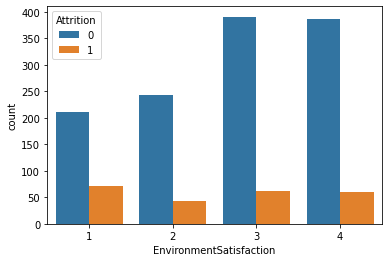

In [35]:
sns.countplot(x='EnvironmentSatisfaction',hue="Attrition",data=dat)

In [36]:

columns=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
for x in columns:
    dat[x]=preprocessing.LabelEncoder().fit_transform(dat[x])
    
dat



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [37]:
#set X and y
X=dat.drop('Attrition',axis=1)
X

y=dat['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [38]:
#data scaling
scaler=StandardScaler()
X=scaler.fit_transform(X)


In [39]:
#Splitting data for train and Test 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


In [40]:
#shape of the data
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(1470, 32)
(1176, 32)
(294, 32)


In [67]:
models=[]
# models.append(('Logistic Regression',LogisticRegression(solver='liblinear',C=0.3,fit_intercept=True)))
# models.append(('Random Forest Classifier',RandomForestClassifier()))
models.append(('Gradient Boosting Classifier',GradientBoostingClassifier()))

In [68]:
print(models)

[('Gradient Boosting Classifier', GradientBoostingClassifier())]


In [69]:
# models=[]
# models.append(('Logistic Regression',LogisticRegression(solver='liblinear',C=0.3,fit_intercept=True)))
# models.append(('Random Forest Classifier',RandomForestClassifier()))
# models.append(('Gradient Boosting Classifier',GradientBoostingClassifier()))

n_folds=5
results=[]
labels=['Not Resigned','Resigned']

for name,model in models:
    K_fold=model_selection.KFold(n_splits=n_folds)
    print('Testing model',name)
    
    #cross validation of results
    cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=K_fold,scoring='f1_weighted',verbose=0,n_jobs=-1)
    
    #fitting the model
    model.fit(X_train,y_train)
    #running predictions and accuracy calculation
    train_pred=model.predict(X_train)
    test_pred=model.predict(X_test)
    train_score=accuracy_score(train_pred,y_train)
    test_score=accuracy_score(test_pred,y_test)
    
    #adding the results to the list 
    results.append(cv_results)
    message=f"Cross_validation mean:{cv_results.mean()},Training Accuracy:{train_score},Test Accuracy:{test_score}"
    print(message)
    print(classification_report(y_test,test_pred,target_names=labels))
    print(confusion_matrix(y_test,test_pred,labels=[0,1]))

Testing model Gradient Boosting Classifier
Cross_validation mean:0.8509214057600646,Training Accuracy:0.9591836734693877,Test Accuracy:0.8299319727891157
              precision    recall  f1-score   support

Not Resigned       0.85      0.96      0.90       236
    Resigned       0.64      0.31      0.42        58

    accuracy                           0.83       294
   macro avg       0.75      0.63      0.66       294
weighted avg       0.81      0.83      0.81       294

[[226  10]
 [ 40  18]]


In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


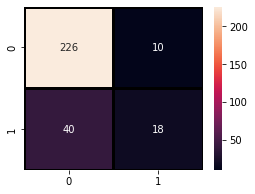

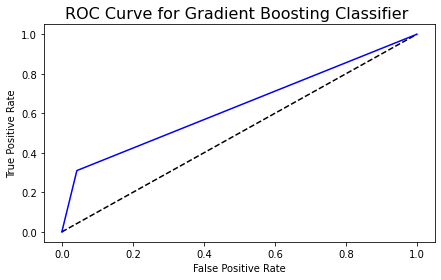

In [72]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, test_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
# plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, test_pred)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "b")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting Classifier ',fontsize=16)
plt.show();

In [73]:
from sklearn.metrics import roc_auc_score
print(f'ROC AUC score is :{roc_auc_score(y_test, test_pred)}')

ROC AUC score is :0.6339859731151373


In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
model1=LogisticRegression(solver='liblinear')
param={'C':(0.2,0.3,0.35,0.45,0.55),'fit_intercept':('True','False')}
clf=GridSearchCV(model1,param)
clf.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.2, 0.3, 0.35, 0.45, 0.55),
                         'fit_intercept': ('True', 'False')})

In [45]:
#print the results of the Grid search as a data frame
res=pd.DataFrame.from_dict(clf.cv_results_)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008075,0.000554,0.000594,0.000038,0.2,True,"{'C': 0.2, 'fit_intercept': 'True'}",0.881356,0.851064,0.87234,0.876596,0.863830,0.869037,0.010677,7
1,0.007819,0.000247,0.000567,0.000034,0.2,False,"{'C': 0.2, 'fit_intercept': 'False'}",0.881356,0.851064,0.87234,0.876596,0.863830,0.869037,0.010677,7
2,0.007967,0.000189,0.000568,0.000026,0.3,True,"{'C': 0.3, 'fit_intercept': 'True'}",0.881356,0.851064,0.87234,0.876596,0.872340,0.870739,0.010385,1
3,0.008022,0.000198,0.000551,0.000029,0.3,False,"{'C': 0.3, 'fit_intercept': 'False'}",0.881356,0.851064,0.87234,0.876596,0.872340,0.870739,0.010385,1
4,0.007996,0.000178,0.000564,0.000021,0.35,True,"{'C': 0.35, 'fit_intercept': 'True'}",0.881356,0.851064,0.87234,0.876596,0.868085,0.869888,0.010393,5
5,0.007993,0.000241,0.000562,0.000031,0.35,False,"{'C': 0.35, 'fit_intercept': 'False'}",0.881356,0.851064,0.87234,0.876596,0.868085,0.869888,0.010393,5
6,0.008282,0.000348,0.000570,0.000020,0.45,True,"{'C': 0.45, 'fit_intercept': 'True'}",0.881356,0.851064,0.87234,0.872340,0.868085,0.869037,0.009975,7
7,0.008277,0.000366,0.000583,0.000038,0.45,False,"{'C': 0.45, 'fit_intercept': 'False'}",0.881356,0.851064,0.87234,0.872340,0.868085,0.869037,0.009975,7
8,0.008320,0.000399,0.000621,0.000025,0.55,True,"{'C': 0.55, 'fit_intercept': 'True'}",0.881356,0.855319,0.87234,0.876596,0.868085,0.870739,0.008881,1
9,0.008329,0.000373,0.000590,0.000036,0.55,False,"{'C': 0.55, 'fit_intercept': 'False'}",0.881356,0.855319,0.87234,0.876596,0.868085,0.870739,0.008881,1


In [47]:
#find the best params
clf.best_params_

{'C': 0.3, 'fit_intercept': 'True'}

In [48]:
#print the best score
clf.best_score_

0.870739271547061

In [49]:
model2=RandomForestClassifier()
param={'n_estimators':(1000,2000),'criterion':('gini','entrophy'),'max_depth':(3,5)}
clf=GridSearchCV(model2,param)
clf.fit(X_train,y_train)

#print the results of the Grid search as a data frame
res=pd.DataFrame.from_dict(clf.cv_results_)
print(res)

#find the best params
print('Best Parameters',clf.best_params_)
#print the best score
print('Best score',clf.best_score_)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/para

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.842725      0.022881         0.123526        0.002460   
1       3.649679      0.027641         0.288801        0.083090   
2       2.078635      0.021301         0.130687        0.002203   
3       4.125042      0.027272         0.259801        0.004194   
4       0.406825      0.005634         0.000000        0.000000   
5       0.784944      0.008469         0.000000        0.000000   
6       0.401412      0.010780         0.000000        0.000000   
7       0.787896      0.004915         0.000000        0.000000   

  param_criterion param_max_depth param_n_estimators  \
0            gini               3               1000   
1            gini               3               2000   
2            gini               5               1000   
3            gini               5               2000   
4        entrophy               3               1000   
5        entrophy               3               2000   
6   

In [50]:
#applying GridSearchCV through a for loop
param={}
param[LogisticRegression()]={'C':(0.2,0.3,0.35,0.45,0.55),'fit_intercept':('True','False'),'solver':('liblinear','newton-cg')}
param[RandomForestClassifier()]={'n_estimators':(700,900),'criterion':('gini','entrophy'),'max_depth':(3,5)}


for key,value in param.items():
    clf=GridSearchCV(key,value)
    clf.fit(X_train,y_train)
    #print the results of the Grid search as a data frame
    res=pd.DataFrame.from_dict(clf.cv_results_)
    print(res)
    #find the best params
    print(key,'Best Parameters',clf.best_params_)
    #print the best score
    print(key,'Best score',clf.best_score_)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1614, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/con

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.008003      0.000409         0.000625        0.000055     0.2   
1        0.001029      0.000111         0.000000        0.000000     0.2   
2        0.007533      0.000082         0.000490        0.000019     0.2   
3        0.000993      0.000056         0.000000        0.000000     0.2   
4        0.007921      0.000118         0.000574        0.000024     0.3   
5        0.001055      0.000125         0.000000        0.000000     0.3   
6        0.007797      0.000143         0.000531        0.000048     0.3   
7        0.001043      0.000154         0.000000        0.000000     0.3   
8        0.007989      0.000207         0.000585        0.000038    0.35   
9        0.000972      0.000078         0.000000        0.000000    0.35   
10       0.007987      0.000207         0.000592        0.000046    0.35   
11       0.001007      0.000116         0.000000        0.000000    0.35   
12       0.0

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/para

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.266905      0.009494         0.085847        0.001086   
1       1.643917      0.025258         0.110703        0.003521   
2       1.446161      0.011075         0.091363        0.003425   
3       1.867130      0.011818         0.148687        0.063146   
4       0.284737      0.007507         0.000000        0.000000   
5       0.361689      0.006693         0.000000        0.000000   
6       0.289121      0.006354         0.000000        0.000000   
7       0.355878      0.003385         0.000000        0.000000   

  param_criterion param_max_depth param_n_estimators  \
0            gini               3                700   
1            gini               3                900   
2            gini               5                700   
3            gini               5                900   
4        entrophy               3                700   
5        entrophy               3                900   
6   